# Set Up

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import seaborn as sns

# plotting defaults
sns.set_theme()
sns.set(font_scale=1.2)

# Overview

*If matplotlib “tries to make easy things easy and hard things possible”, seaborn tries to make a well-defined set of hard things easy too.*

**Seaborn**
- Built on top of matplotlib
- Plotting functions are split into different modules

**Axes-level functions**
- Act like matplotlib functions
- Specify axis using `ax` kwarg

**Figure-level functions**
- Wrap axes-level functions and plot on their own figure
- Axes-level functions are specified using `kind` kwarg
- Usually returns `FacetGrid`
- Use `height` and `aspect` to control size of *each* facet (`width = height * aspect`)

**FacetGrid**
- Has methods for customising attributes (e.g. `set_axis_labels`)
- Access underlying matplotlib objects using methods `figure`, `ax`, and `legend`

**Function modules** (and figure-level functions)
- Relation (`relplot`)
- Distribution (`displot`)
- Categorical (`catplot`)
- Regression
- Matrix

# Relationships

**Overview**
- Use `relplot` to visualise statistical relationships
- Axes-level functions
    - Scatter: `kind = "scatter"`
    - Line: `kind = "line"`
- Map additional variables using `hue`, `style`, and `size` semantics
- Split into facets by variable using `col` and `row`

**Guidelines**
- Hue uses a sequential palette if the variable is numerical
- Line plots:
    - Differences from `size` kwarg can be hard to distinguish
    - If there are multiple y-values for each x-value Seaborn plots the mean and a 95% confidence interval (via bootstrapping)
        - Can replace with the standard deviation using `errorbar="sd"`
- When a variable has many values, best to facet on columns and wrap into rows using `col_wrap`
- "Several simple plots are usually more effective than one complex plot"


## Scatter Plots

In [2]:
# sample dataset
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


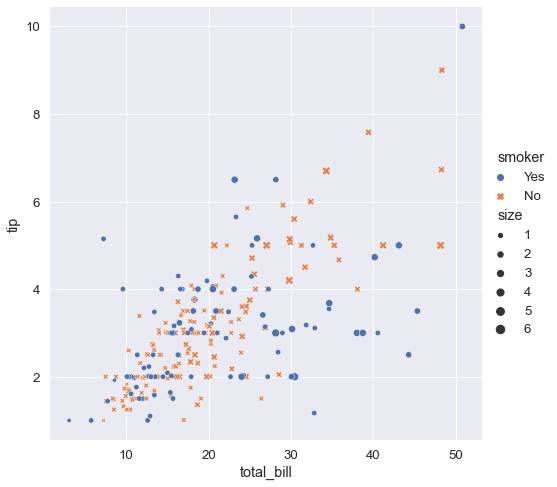

In [3]:
# simple scatterplot
sns.relplot(
    data=tips,
    x="total_bill",
    y="tip",
    hue="smoker",
    style="smoker",
    size="size",
    height=7,
);

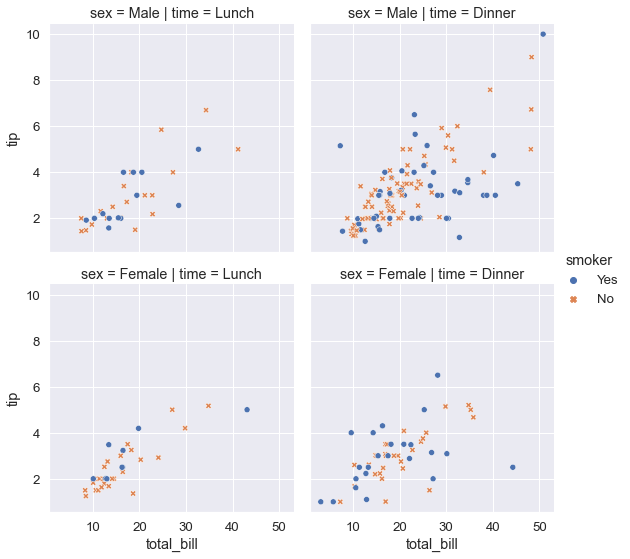

In [4]:
# multiple facets
sns.relplot(
    data=tips,
    x="total_bill",
    y="tip",
    col="time",
    row="sex",
    hue="smoker",
    style="smoker",
    height=4,
);

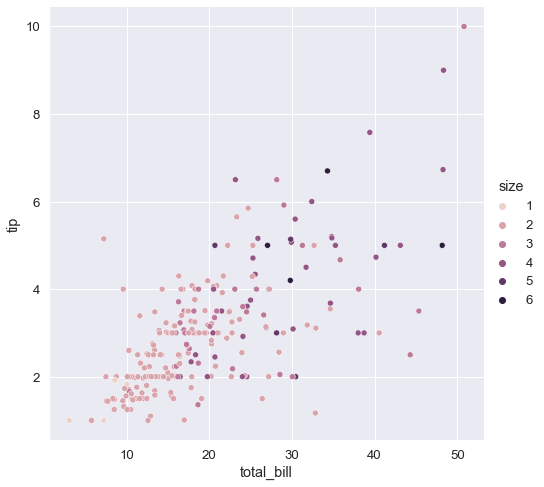

In [5]:
# sequential palette for hue
sns.relplot(data=tips, x="total_bill", y="tip", hue="size", height=7);

## Line Plots

In [6]:
# sample data
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


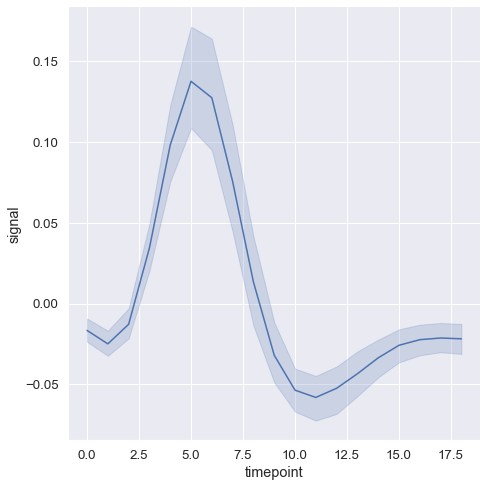

In [7]:
sns.relplot(data=fmri, x="timepoint", y="signal", kind="line", height=7);

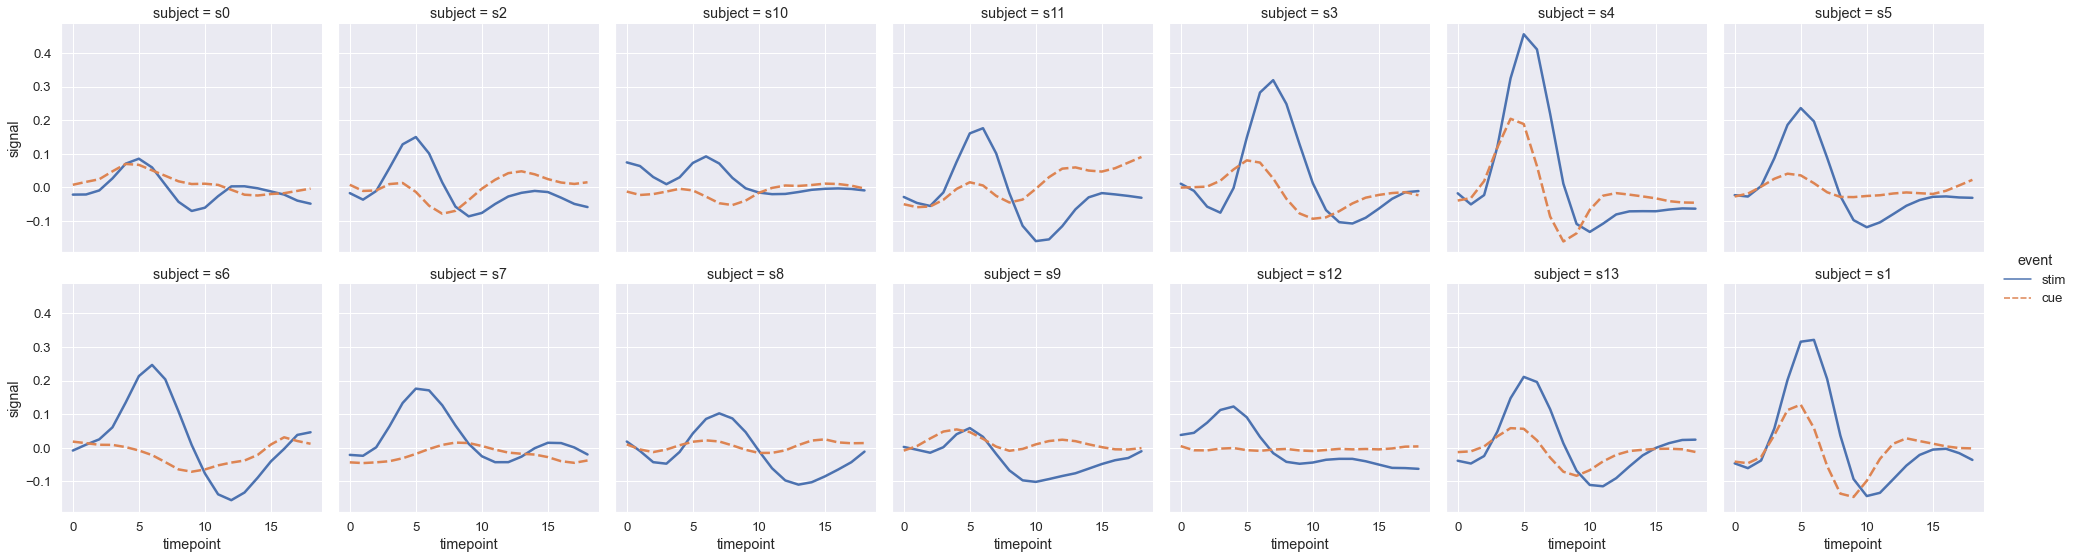

In [8]:
sns.relplot(
    data=fmri.query("region == 'frontal'"),
    kind="line",
    x="timepoint",
    y="signal",
    hue="event",
    style="event",
    col="subject",
    col_wrap=7,
    height=4,
    linewidth=2.5,
);

# Distributions

**Overview**
- Use `displot` to visualise univariate distributions
- Axes-level functions
    - *Histogram*: `kind = "hist"`
    - *Kernel Density Estimation*: `kind = "kde"`
    - *Empirical Cumulative Distribution Function*: `kind="ecfd"`
- Can also add *rug plots* on axes using `rug=True`


## Histograms

- Use `binwidth` or `bins` kwargs to change binning
- Use `discrete=True` for discrete data
- Use `shrink` kwarg for gaps between bars (i.e. for categorical data)

In [9]:
# sample data
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


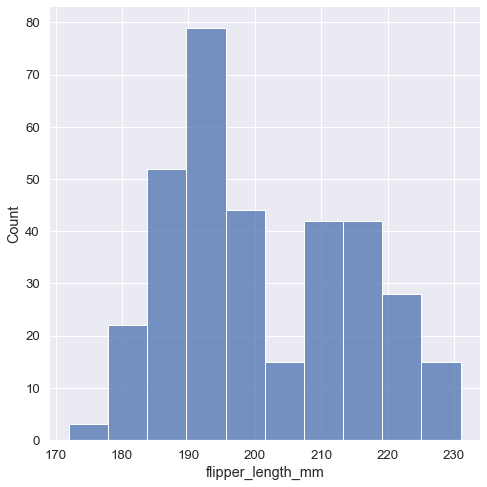

In [10]:
# standard histogram
sns.displot(data=penguins, x="flipper_length_mm", height=7);

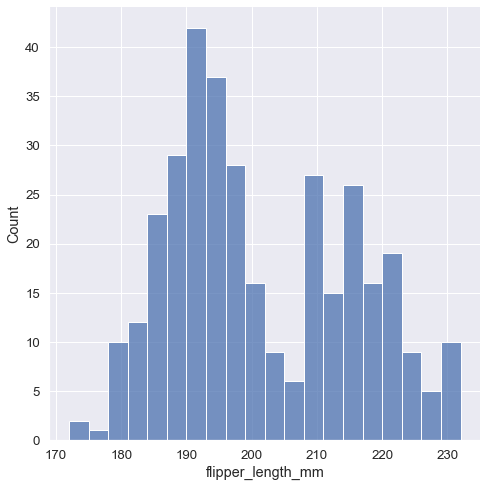

In [11]:
# changing bin width
sns.displot(data=penguins, x="flipper_length_mm", binwidth=3, height=7);

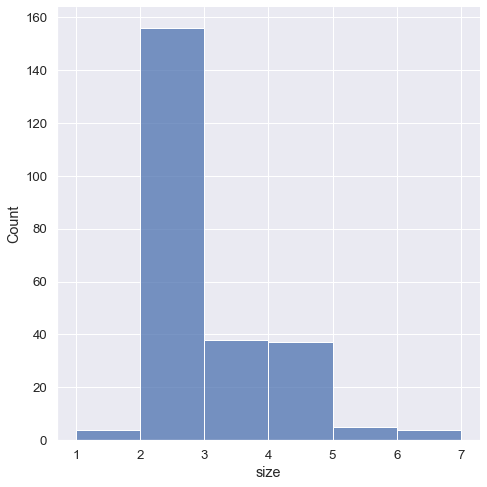

In [12]:
# specify bin breaks for sparse data
bins = [1, 2, 3, 4, 5, 6, 7]
sns.displot(data=tips, x="size", bins=bins, height=7);

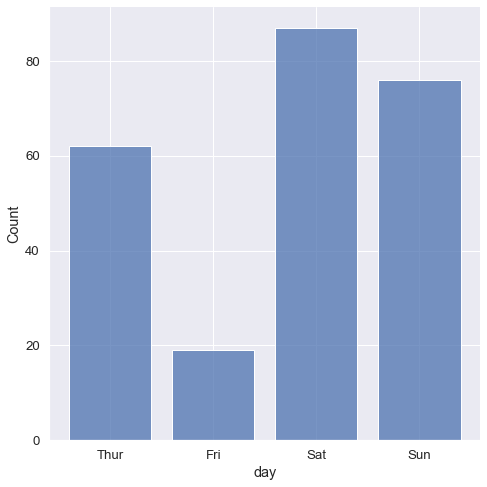

In [13]:
# add gaps for categorical data
sns.displot(data=tips, x="day", shrink=0.8, height=7);

### Conditioning
- Use `hue` to condition on another variable
- Histograms are layered by default
- Set `multiple` to `"stack"` or `"dodge"` to separate bars vertically or horizontally

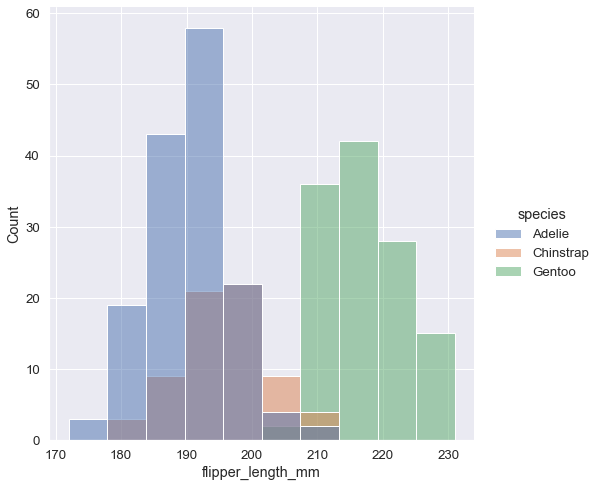

In [14]:
# condition on species
sns.displot(data=penguins, x="flipper_length_mm", hue="species", height=7);

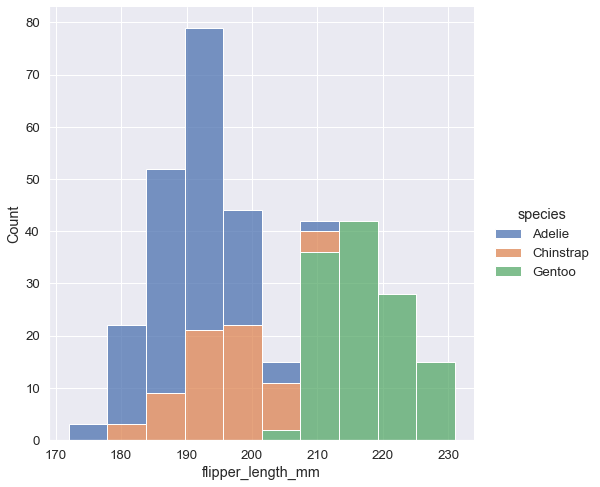

In [15]:
# stack to separate bars
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack", height=7);

### Normalising

- Set `stat="density"` to normalise sum of area to 1
- Set `stat="probability"` to normalise sum of *heights* to 1 (e.g. for discrete data)
- Set `common_norm=False` to normalise different hues separately

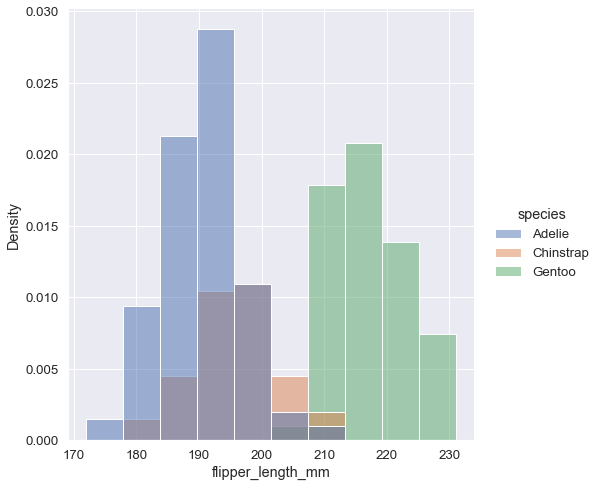

In [16]:
# normalise total
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="density", height=7);

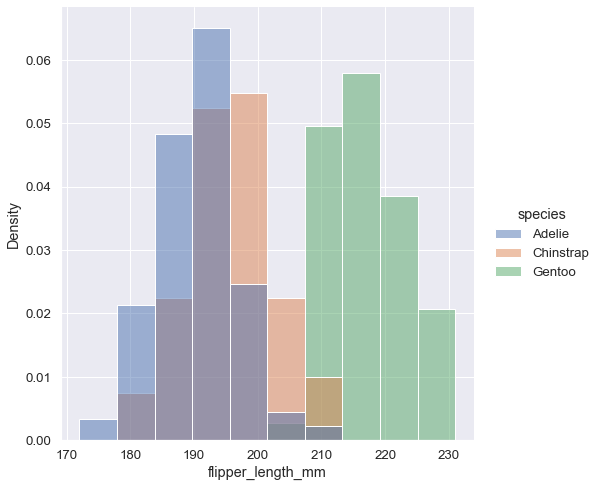

In [17]:
# normalise each species separately
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="density", common_norm=False, height=7);

## Kernel Density Estimation

- Use `bw_adjust` to adjust the smoothing bandwidth (default is 1)
- Use `multiple="stack"` to stack when conditioning
- Use `kde=True` *without* `kind="kde"` to layer KDE on top of histogram

*The logic of KDE assumes that the underlying distribution is smooth and unbounded. One way this assumption can fail is when a variable reflects a quantity that is naturally bounded. If there are observations lying close to the bound (for example, small values of a variable that cannot be negative), the KDE curve may extend to unrealistic values.*

*The KDE approach also fails for discrete data or when data are naturally continuous but specific values are over-represented. The important thing to keep in mind is that the KDE will always show you a smooth curve, even when the data themselves are not smooth.*

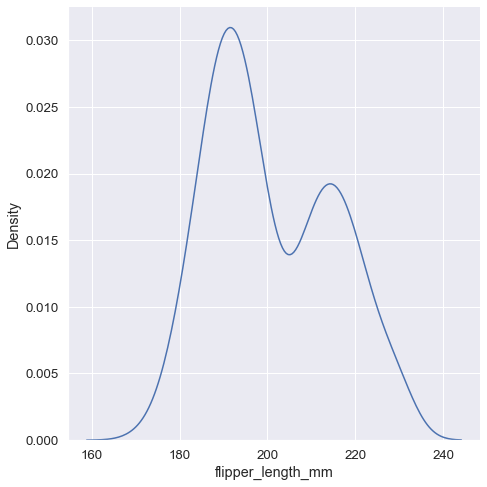

In [18]:
sns.displot(data=penguins, x="flipper_length_mm", kind="kde", bw_adjust=1, height=7);

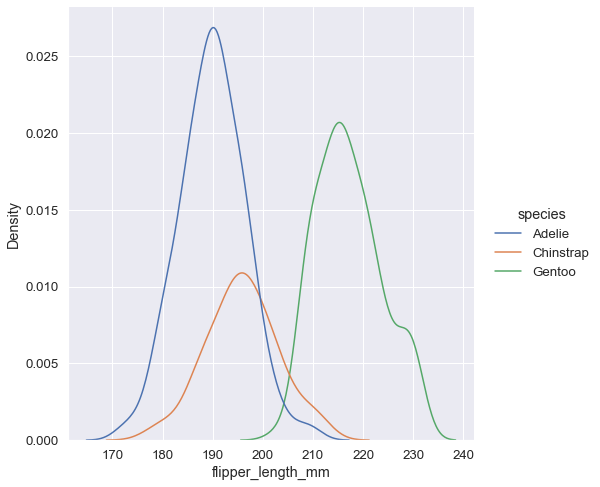

In [19]:
# conditioning on other variables
sns.displot(data=penguins, x="flipper_length_mm", kind="kde", bw_adjust=1, hue="species", height=7);

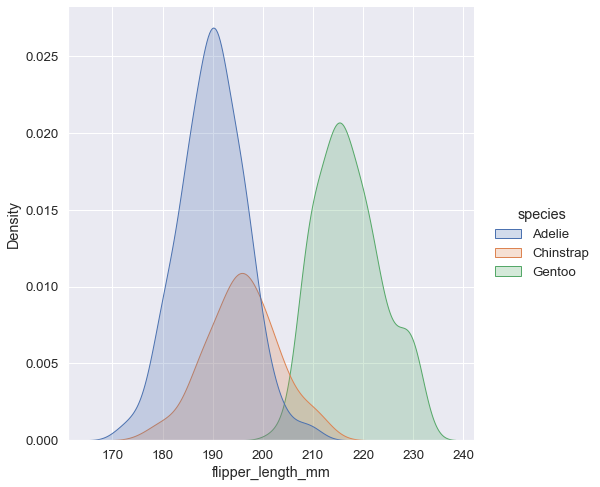

In [20]:
# fill densities
sns.displot(data=penguins, x="flipper_length_mm", kind="kde", bw_adjust=1, hue="species", fill=True, height=7);

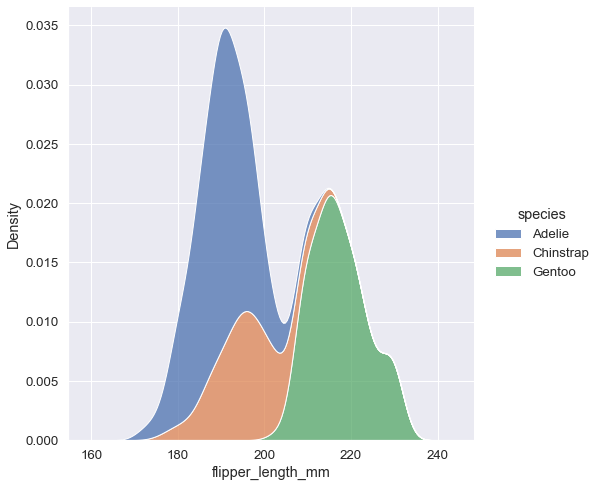

In [21]:
# stack different densities
sns.displot(data=penguins, x="flipper_length_mm", kind="kde", bw_adjust=1, hue="species", multiple="stack", height=7);

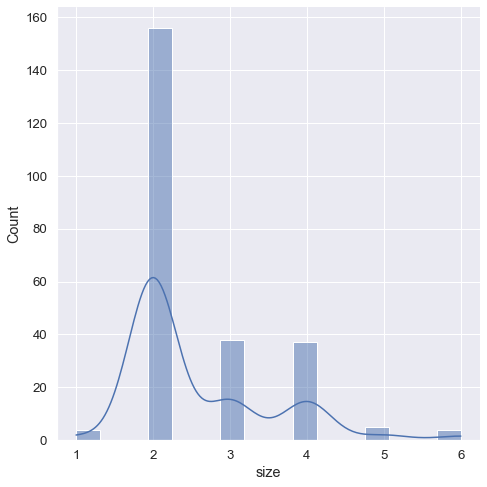

In [22]:
sns.displot(data=tips, x="size", kde=True, height=7);

## Empirical Cumulative Distribution Functions

*...because the curve is monotonically increasing, it is well-suited for comparing multiple distributions*

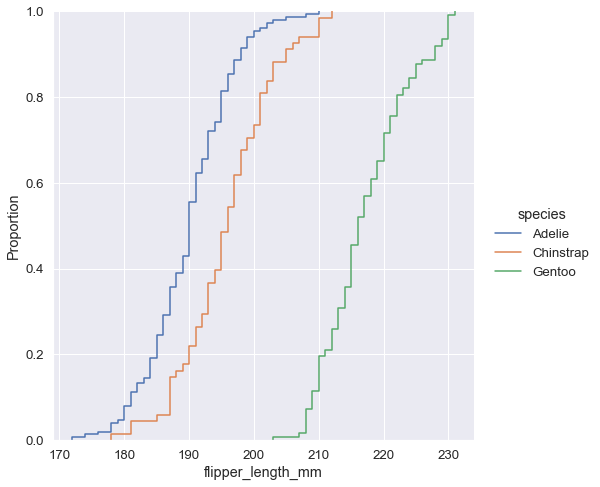

In [23]:
sns.displot(data=penguins, x="flipper_length_mm", kind="ecdf", hue="species", height=7);

## Bivariate Distributions

- Specify `y` kwarg to plot a bivariate distribution
- Histograms:
    - 1 or both can be discrete
    - Hues are only effective *if there is minimal overlap between the conditional distributions*
    - Add a colour bar with `cbar=True`
    - Specify `binwidth` or `bins` as a pair
- KDE:
    - Curves show evenly spaced level sets of proportions of density
    - Use `thresh` to set lowest level
    - Use `levels` to set number of levels (or a list of level values)


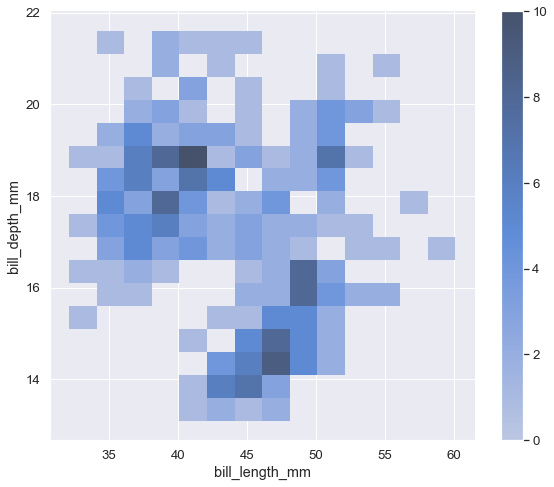

In [24]:
# bivariate histogram
sns.displot(data=penguins, x="bill_length_mm", y="bill_depth_mm", binwidth=(2, .5), cbar=True, height=7, aspect=1.2);

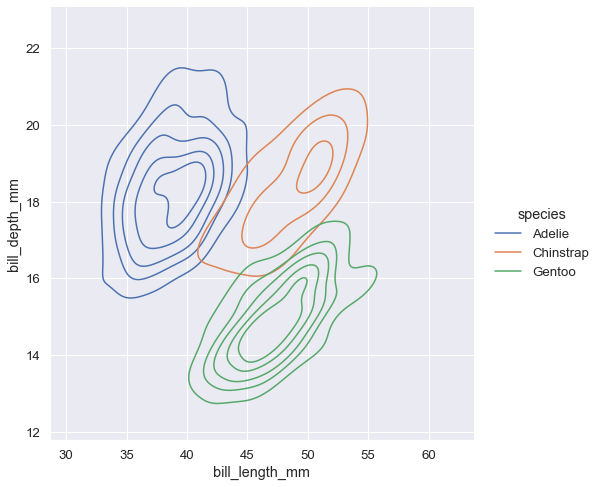

In [25]:
# bivariate histogram
sns.displot(data=penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde", hue="species", thresh=0.1, levels=6, height=7);

## Joint & Marginal Distributions

- Use `jointplot` to add univariate distributions to a bivariate relational/distribution plot
- Setting `kind` will change both bivariate and marginal plots
- Returns `JointGrid`

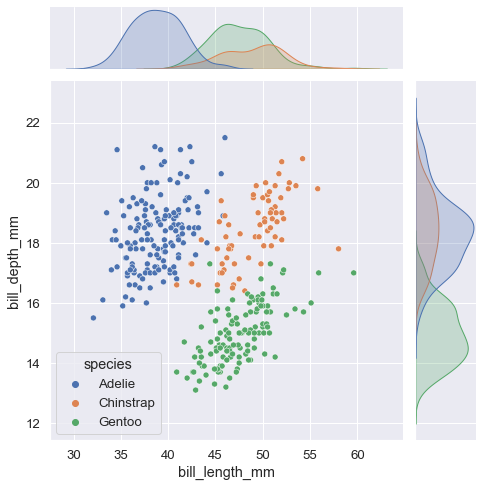

In [26]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", height=7);

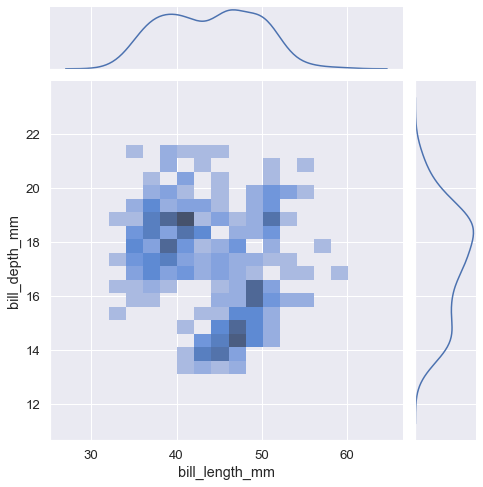

In [27]:
# set joint and marginal details
grid = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm", height=7)
grid.plot_joint(sns.histplot, binwidth=(2, .5))
grid.plot_marginals(sns.kdeplot);

### Rug Plots

- Add `rug=True` to add a rug plot to axes of `displot`
- Axes-level `rugplot` adds rugs to side of any plot

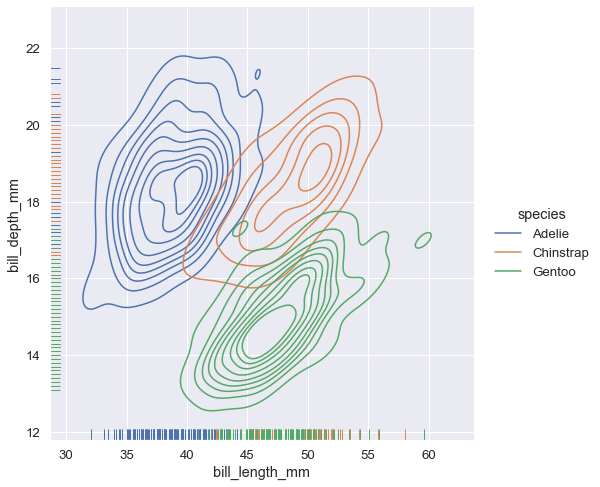

In [28]:
sns.displot(data=penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde", hue="species", rug=True, height=7);

### Plotting Many Distributions

- Use `pairplot` to plot joint and marginal distributions for all pairs of variables
- Returns `PairGrid`

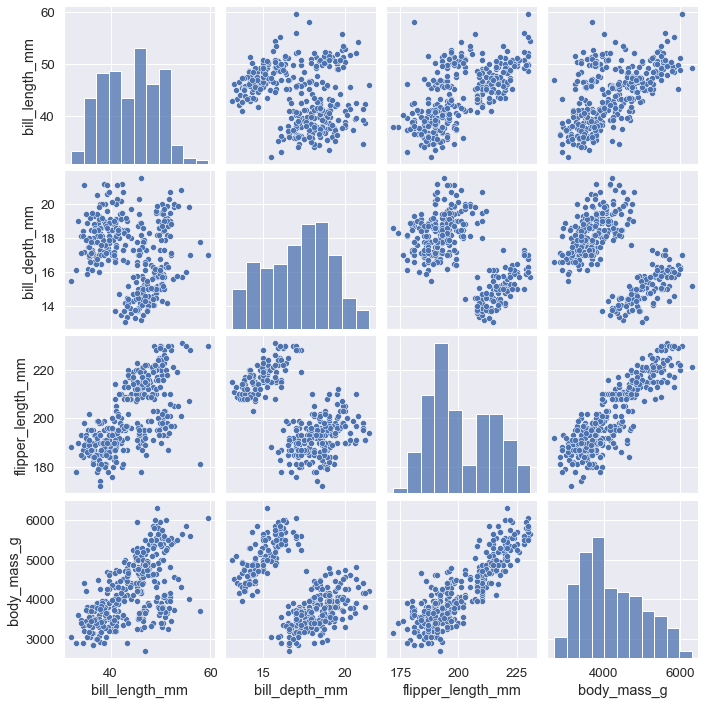

In [29]:
sns.pairplot(data=penguins);

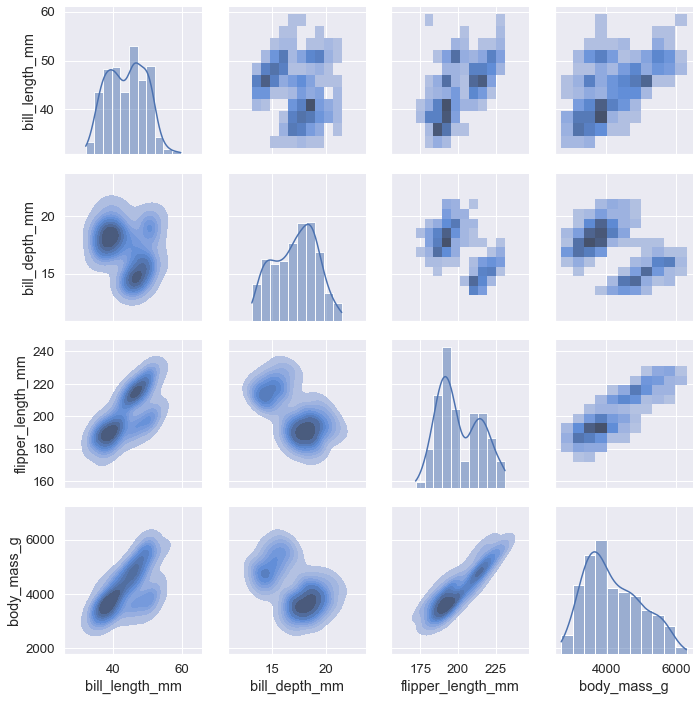

In [30]:
# specify details on grid object
grid = sns.PairGrid(data=penguins)
grid.map_upper(sns.histplot)
grid.map_lower(sns.kdeplot, fill=True)
grid.map_diag(sns.histplot, kde=True);

# Categorical

- Figure-level function is `catplot`
- 3 families of axes-level functions going from more to less granularity
    - Scatterplots
    - Distribution plots
    - Estimate plots
- Use `order` to set order of categories

## Scatterplots

- Show every individual datapoint
- Axes-level functions:
    - *Strip plot*: `kind="strip"`
        - Adds random jitter to avoid overlap (`jitter` kwarg)
    - *Swarm plot*: `kind="swarm"`
        - Adjusts points to avoid overlap

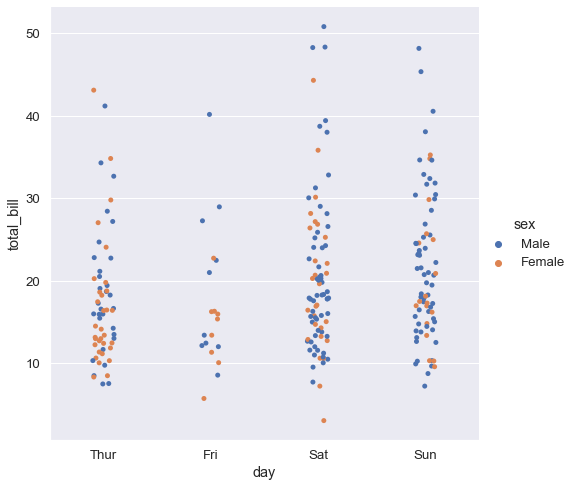

In [31]:
# strip plot
sns.catplot(data=tips, x="day", y="total_bill", hue="sex", height=7);

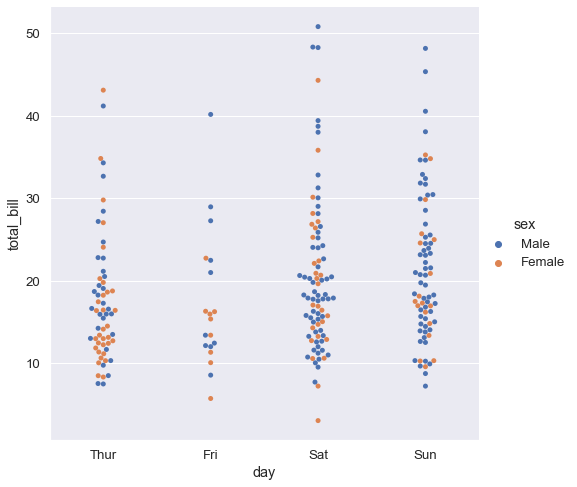

In [32]:
# swarm plot
sns.catplot(data=tips, x="day", y="total_bill", kind="swarm", hue="sex", height=7);

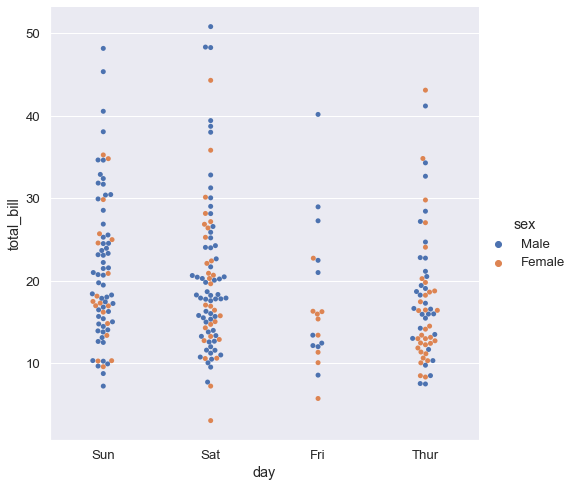

In [33]:
# change order of categories
sns.catplot(data=tips, x="day", y="total_bill", kind="swarm", hue="sex", order=["Sun", "Sat", "Fri", "Thur"], height=7);

## Distributions

- Better when datasets get larger
- Axes-level functions
    - *Box plot*: `kind="box"`
        - Shows middle 3 quartiles, whiskers to points within 1.5 IQRs, and outliers
    - *Boxen plot*: `kind="boxen"`
        - Shows additional information about distribution
        - *Better for larger datasets*
    - *Violin plot*: `kind="violin"`
        - Combines boxplot with KDE
        - If hue is binary, put them on one 'violin' using `split=True`
        - Can replace boxplot using `inner`
        - Also useful to layer scatter/swarm plot on top

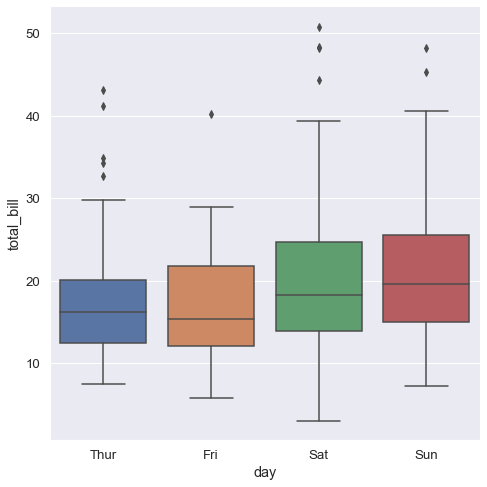

In [34]:
# box plot
sns.catplot(data=tips, x="day", y="total_bill", kind="box", height=7);

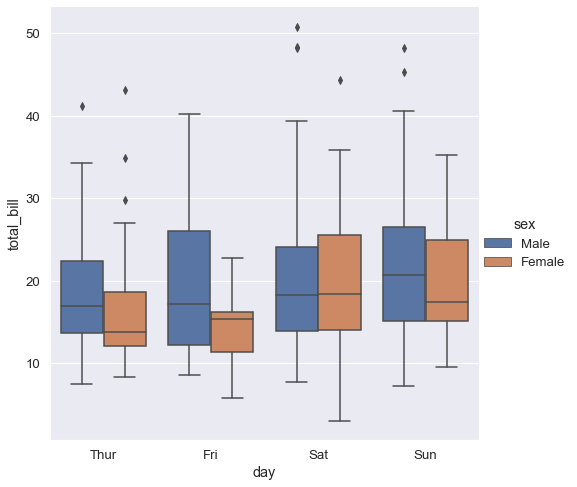

In [35]:
# with hue
sns.catplot(data=tips, x="day", y="total_bill", kind="box", hue="sex", height=7);

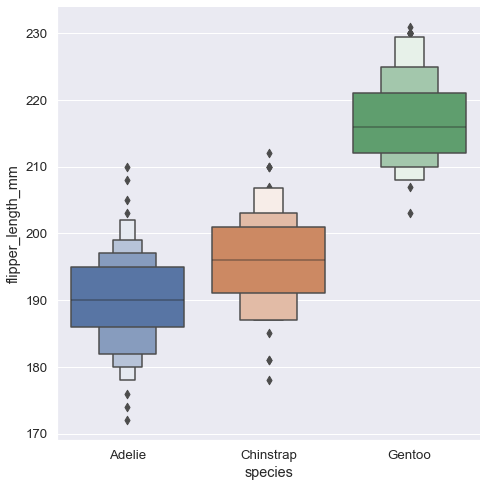

In [36]:
# boxen plot
sns.catplot(data=penguins, x="species", y="flipper_length_mm", kind="boxen", height=7);

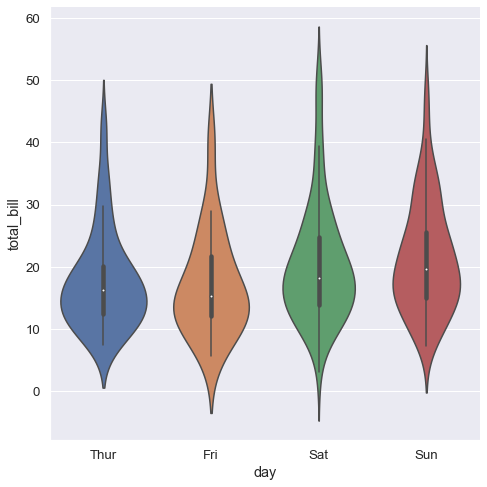

In [37]:
# violin plot
sns.catplot(data=tips, x="day", y="total_bill", kind="violin", height=7);

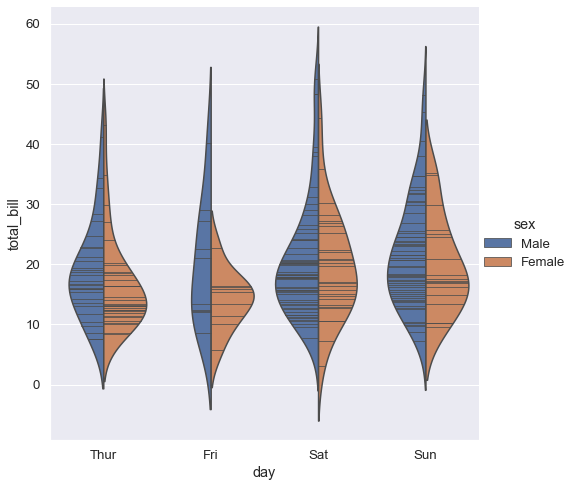

In [38]:
# violin plot split hue and inner sticks
sns.catplot(data=tips, x="day", y="total_bill", kind="violin", hue="sex", split=True, inner="stick", height=7);

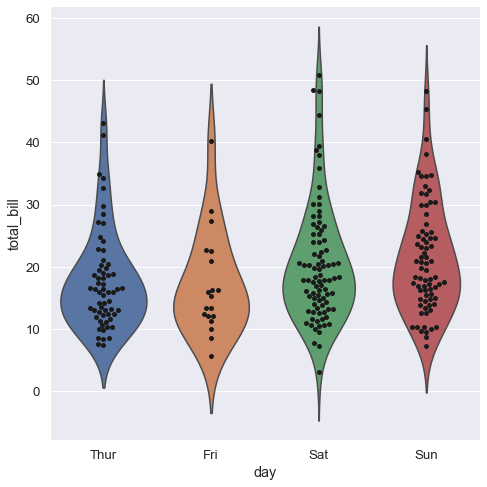

In [39]:
# violin with swarm plot
grid = sns.catplot(data=tips, x="day", y="total_bill", kind="swarm", color="k", height=7)
sns.violinplot(data=tips, x="day", y="total_bill", inner=None, ax=grid.ax);

## Estimates

- Plots a single statistic - mean, median, count etc.
- Axes-level functions
    - *Count plot*: `kind="count"`
        - Counts for each category
    - *Bar plot*: `kind="bar"`
        - Mean for each category (change with `estimator`)
        - Adds 95% confidence interval using bootstrapping (change with `errorbar`)
    - *Point plot*: `kind="point"`
        - Doesn't show whole bar
        - Connects points in adjacent categories (so best for ordinal data)
        - *"makes it easy to see how the main relationship is changing as a function of the hue semantic, because your eyes are quite good at picking up on differences of slopes"*

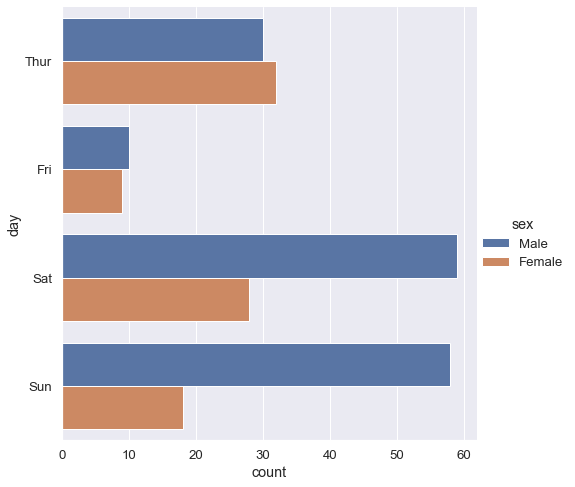

In [40]:
# count plot
sns.catplot(data=tips, y="day", hue="sex", kind="count", height=7);

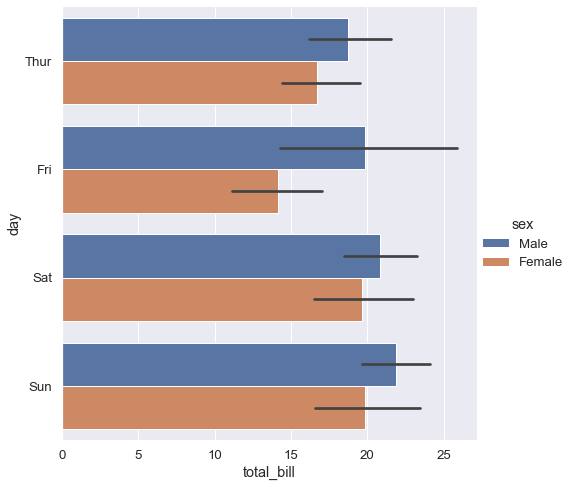

In [41]:
# bar plot
sns.catplot(data=tips, x="total_bill", y="day", hue="sex", kind="bar", height=7);

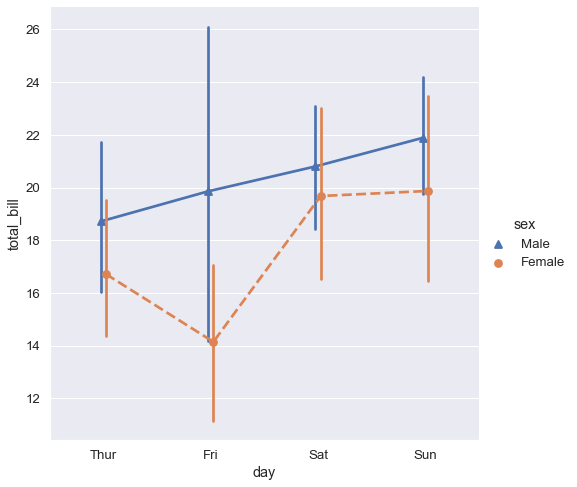

In [42]:
# point plot
sns.catplot(data=tips, x="day", y="total_bill", hue="sex", kind="point", dodge=True,markers=["^", "o"], linestyles=["-", "--"],height=7);

*The error bars around an estimate of central tendency can show one of two general things: either the range of uncertainty about the estimate or the spread of the underlying data around it*

*These measures are related: given the same sample size, estimates will be more uncertain when data has a broader spread. But uncertainty will decrease as sample sizes grow, whereas spread will not.*

In [46]:
def plot_errorbars(arg, **kws):
    np.random.seed(sum(map(ord, "error_bars")))
    x = np.random.normal(0, 1, 100)
    f, axs = plt.subplots(2, figsize=(7, 2), sharex=True)
    sns.pointplot(x=x, errorbar=arg, **kws, capsize=.3, ax=axs[0])
    sns.stripplot(x=x, jitter=.3, ax=axs[1])

Standard deviation: average distance to the sample mean

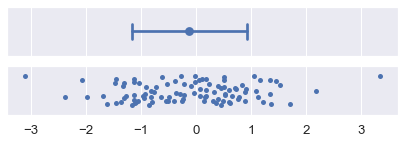

In [47]:
plot_errorbars("sd")

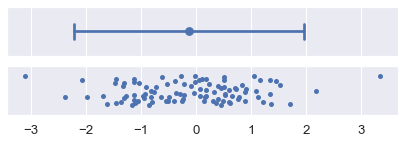

In [50]:
plot_errorbars(("sd", 2))

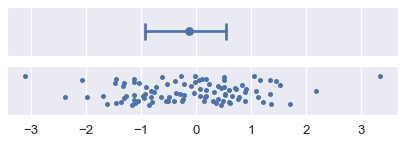

In [51]:
plot_errorbars(("pi", 50))

Reflects skew in data

# Bootstrapping

**Overview**
- A non-parametric technique to estimate the sampling distribution of a statistic
- From there estimate variance, confidence intervals etc of sample estimate
- Based around resampling the sample with replacement (resample has same size as original) multiple times, treating these as independent samples, and observing empirical distribution of statistic
- Idea is to measure quality of inference (resample -> sample) and use this to estimate quality of inference (sample -> population)


**Advantages**
- *Although for most problems it is impossible to know the true confidence interval, bootstrap is asymptotically more accurate than the standard intervals obtained using sample variance and assumptions of normality*
- *There is evidence that numbers of samples greater than 100 lead to negligible improvements in the estimation of standard errors. In fact, according to the original developer of the bootstrapping method, even setting the number of samples at 50 is likely to lead to fairly good standard error estimates.*

**Disadvantages**
- *ignorant use of bootstrapping will not always yield asymptotically valid results and can lead to inconsistency*
- *The apparent simplicity may conceal the fact that important assumptions are being made when undertaking the bootstrap analysis (e.g. independence of samples or large enough of a sample size) where these would be more formally stated in other approaches*

**Recommended Uses**
- When theoretical distribution statistic is complicated or unknown
- When sample size is insufficient for straightforward statistical inference. If the underlying distribution is well-known, bootstrapping provides a way to account for the distortions caused by the specific sample that may not be fully representative of the population.

## Confidence Intervals

Bootstrapping can be used to estimate confidence intervals. Let $\theta$ be the statistic of interest, $\hat{\theta}$ its sample estimate, and $\theta_i^*$ the bootstrapped estimates.

We want a confidence interval for $\theta$. Obviously this will be centred on $\hat{\theta}$ so consider the distribution of $\hat{\theta} - \theta$. Let $a_{\alpha}$ denote the $\alpha$-quantile for $\hat{\theta} - \theta$ ($0<\alpha<1$), so

\begin{equation}
    P\left( \hat{\theta} - \theta \leq a_{\alpha} \right) = \alpha.
\end{equation}

Then, by rearranging, an equitailed $(1-\alpha)100$% confidence interval for $\theta$ is given by

\begin{equation}
    \left( \hat{\theta} - a_{1-\alpha / 2}, \hat{\theta} - a_{\alpha / 2} \right).
\end{equation}

**Basic Bootstrap Interval:** Estimate the percentiles of $\hat{\theta} - \theta$ using the empirical percentiles of $\theta_i^* - \hat{\theta}$. Let $\theta_{(\alpha)}^*$ denote the empirical $\alpha$ percentile of the bootstrapped statistics $\theta_i^{*}$. Then we can estimate

\begin{equation}
    a_{\alpha} \approx \theta_{(\alpha)}^* - \hat{\theta}.
\end{equation}

Substituting this gives the following confidence interval for $\theta$:

\begin{equation}
    \left( 2\hat{\theta} - \theta_{(1 - \alpha / 2)}^*, 2\hat{\theta} - \theta_{(\alpha / 2)}^* \right).
\end{equation}

**Percentile Bootstrap Interval:** If we assume the distribution of $\hat{\theta} - \theta$ is symmetric about 0, then $a_{1 - \alpha / 2}^* = -a_{\alpha/2}$ so the confidence interval becomes

\begin{equation}
    \left( \hat{\theta} + a_{\alpha / 2}, \hat{\theta} + a_{1-\alpha / 2} \right).
\end{equation}

Now substituting gives the confidence interval

\begin{equation}
    \left( \theta_{(\alpha / 2)}^*, \theta_{(1 - \alpha / 2)}^* \right).
\end{equation}

**Studentised Bootstrap Interval:** Analogous to the standard confidence interval, but replacing the quantiles from the Student approximation by the quantiles from the bootstrap distribution of the Student's $t$-test:

\begin{equation}
    \left( \hat{\theta} - t_{(1 - \alpha / 2)}^* \hat{\sigma}, \hat{\theta} - t_{(\alpha / 2)}^* \hat{\sigma} \right)
\end{equation}

**Assumptions**
- Basic bootstrap: the distribution of $\hat{\theta} - \theta$ is approximately *pivotal* (doesn't depend on any unknown parameters)
- Percentile bootstrap: the distribution of $\hat{\theta} - \theta$ is approximately pivotal and symmetric
- Studentised bootstrap: the distribution of $(\hat{\theta} - \theta) / \hat{\sigma}$ is approximately *pivotal* 

## Example

The example below takes a random normal sample $X_1,\ldots, X_n \sim \mathcal{N}\left(\mu, \sigma^2\right)$ and looks at the sample mean $\overline{X}$. We boostrap the sample to estimate the distribution of $\overline{X}$ and plot a confidence interval around it (for simplicity I used Seaborn's inbuilt confidence interval so technically this doesn't use the same bootstrap resamples).

For a normal distribution we know that $\overline{X} \sim \mathcal{N}\left(\mu, \frac{\sigma^2}{n}\right)$ so we also plot the true distribution of the sample mean. Note that the population mean $\mu$ (generally) falls within the bootstrapped confidence interval for the sample mean.

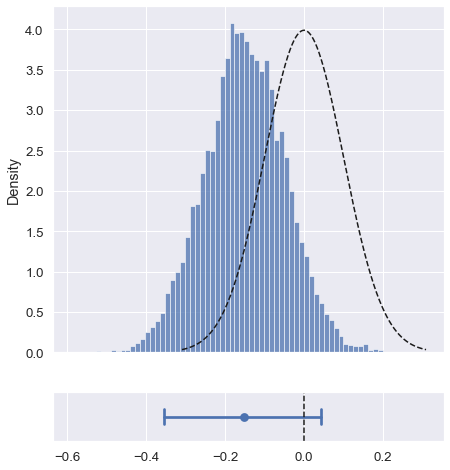

In [149]:
from scipy.stats import norm

mean = 0
std_dev = 1.0
n_samples = 100

# random sample
sample = np.random.normal(loc=mean, scale=std_dev, size=n_samples)
sample_mean = sample.mean()

# bootstrap resamples
n_boot = 10000
resamples = np.random.choice(sample, size=(n_samples, n_boot), replace=True)
bootstrap_means = resamples.mean(axis=0)

# true distribution of sample mean
std_err = std_dev / np.sqrt(n_samples)
x_plot = np.linspace(norm.ppf(0.001, mean, std_err), norm.ppf(0.999, mean, std_err), 1000)
y_plot = norm.pdf(x_plot, mean, std_err)

# figure
f, axs = plt.subplots(2, figsize=(7, 8), gridspec_kw={'height_ratios': [7, 1]}, sharex=True)

# histogram of bootstrap means and true distribution of sample mean
sns.histplot(data=bootstrap_means, stat="density", ax=axs[0])
axs[0].plot(x_plot, y_plot, color="k", linestyle="--")

# confidence interval around sample mean with population mean
# seaborn constructs ci by taking percentiles of the bootstrapped estimator
confidence_level = 95
sns.pointplot(x=sample, errorbar=("ci", confidence_level), n_boot=n_boot, capsize=.3, ax=axs[1])
axs[1].axvline(mean, color="k", linestyle="--");

---

`lmplot`
- Linear Regression

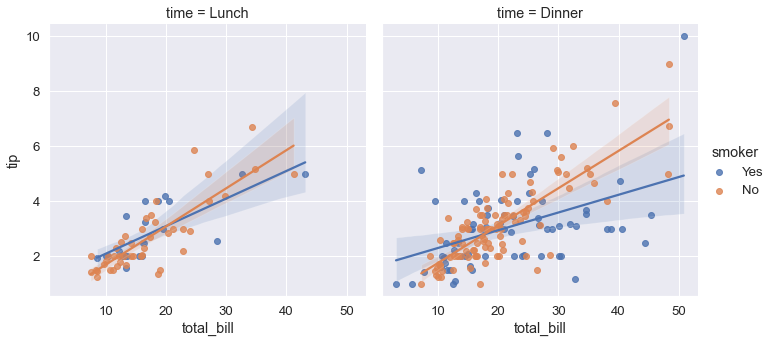

In [43]:
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")

Q:
- How does Seaborn estimate confidence intervals (bootstrapping)?
- How does Seaborn generate intervals with linear regression?